In [1]:
import torch
import torch.nn as nn

In [86]:
embed_dim = 76

In [141]:
class PatchEmbed(nn.Module):
    def __init__(self, img_size, patch_size, in_chans=3, embed_dim=76):
        super(PatchEmbed, self).__init__()
        self.img_size = img_size
        self.patch_size = patch_size
        self.in_chans = in_chans
        self.embed_dim = embed_dim
        self.n_patches = (img_size // patch_size)**2
        self.proj = nn.Conv2d(in_chans, embed_dim, kernel_size= patch_size, stride=patch_size,)

    def forward(self, x):
        x = self.proj(x)
        # x = x.flatten(2)
        # x = x.transpose(1,2)
        return x

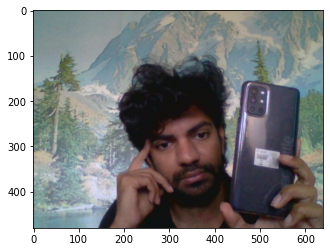

In [142]:
import cv2
import matplotlib.pyplot as plt
from torchvision import transforms   

img = cv2.imread("img1.jpg")
trans = transforms.Compose([transforms.ToTensor(),transforms.Resize((224, 224))])
img_resize = trans(img)
channels, height, width = img_resize.shape
img_show = img_resize.permute(1,2,0).numpy()
img_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img_resize.permute(1,2,0).numpy())
plt.imshow(img_show)

In [143]:
patch = PatchEmbed(img_size=height, embed_dim = embed_dim, patch_size = 16)
patches = patch(img_resize.unsqueeze(0))

shape of image 224 and size of patches is 16 and number of patches is 196 that is 14.0*14.0
Feature Maps of the patches created


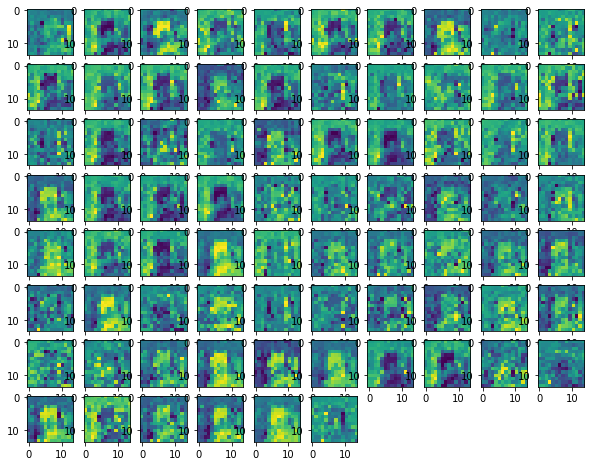

In [144]:
print(f"shape of image {patch.img_size} and size of patches is {patch.patch_size} and number of patches is {patch.n_patches} that is {patch.n_patches**0.5}*{patch.n_patches**0.5}")
print("Feature Maps of the patches created")
plt.figure(figsize=(10,10)) # specifying the overall grid size
the_array = patches.squeeze().detach().numpy()
if len(the_array.shape) == 2:
    the_array = patches.squeeze().detach().unsqueeze(dim=2).numpy()
for i in range(embed_dim):
    plt.subplot(10,10,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(the_array[i])
plt.show()

#### Add positional embeddings